In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
# 导入模块

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

3.1.2 随机变量及其分布

In [2]:
# 随机种子 → 种子不变则产生随机数一样

r = np.random.RandomState(1)
r.rand(10)

array([  4.17022005e-01,   7.20324493e-01,   1.14374817e-04,
         3.02332573e-01,   1.46755891e-01,   9.23385948e-02,
         1.86260211e-01,   3.45560727e-01,   3.96767474e-01,
         5.38816734e-01])

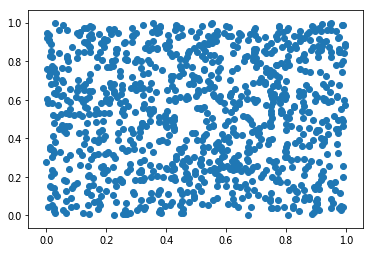

In [3]:
# 均匀分布

x = r.rand(1000)
y = r.rand(1000)
plt.scatter(x,y)

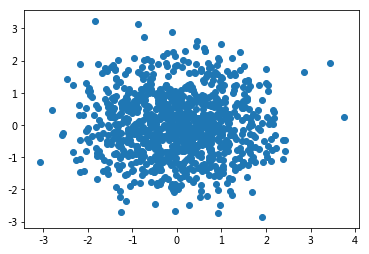

In [4]:
# 正态分布 - 标准正态分布，均值为0，方差为1

x = r.randn(1000) 
y = r.randn(1000)
plt.scatter(x,y)

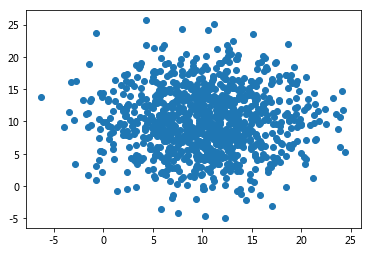

In [5]:
# 正态分布
# normal(loc=0.0, scale=1.0, size=None)
# loc：均值，scale：标准差，size：抽取样本的size

x = r.normal(10,5,1000) 
y = r.normal(10,5,1000) 
plt.scatter(x,y)

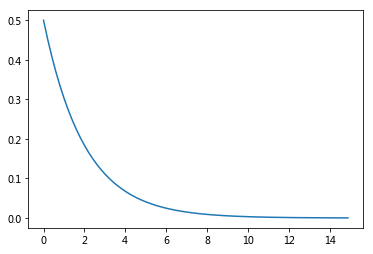

In [6]:
# 指数分布

lambd = 0.5
x = np.arange(0,15,0.1)
y = lambd * np.exp(-lambd * x)
plt.plot(x,y)

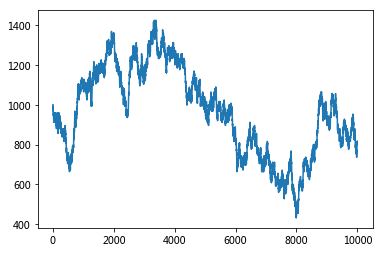

In [7]:
# 二项分布
# .binomial(n, p, size=None)表示对一个二项分布进行采样,s为成功次数 
# P(N)=CsnPs(1−P)n−s
# size:采样的次数  n:p即式中的n   p:函数的返回值表示n中发生/成功的次数s.

# 同时抛弃9枚硬币，如果正面朝上少于5枚，则输掉8元，否则就赢8元。
# 如果手中有1000元作为赌资，请问赌博10000次后可能会是什么情况呢？

binomial = np.random.binomial(9,0.5,10000)  #生成二项分布随机数
money = np.zeros(10000) #生成10000次赌资的列表
money[0] = 1000 #首次赌资为1000元

for i in range(1,10000):
    if binomial[i]<5:
        money[i] = money[i-1] - 8  
        # 如果少于5枚正面，则在上一次赌资的基础上输掉8元
    else:
        money[i] = money[i-1] + 8
        # 如果至少5枚正面，则在上一次赌资的基础上赢取8元
    
plt.plot(np.arange(10000),money)

In [8]:
# 二项分布
# 将一枚硬币抛掷三次：恰好出现一次正面与至少有一次出现正面的概率

a1 = sum(np.random.binomial(3,0.5,10000)==1)/10000
a2 = sum(np.random.binomial(3,0.5,10000)>0)/10000
print('恰好出现一次正面的概率为%.4f, 至少有一次出现正面的概率为%.4f' % (a1,a2))

恰好出现一次正面的概率为0.3745, 至少有一次出现正面的概率为0.8731


In [10]:
# 随机选择

r.choice(['a','b','c','d','e','f'],size = 40)

array(['f', 'b', 'e', 'b', 'a', 'd', 'c', 'e', 'b', 'e', 'c', 'a', 'a',
       'a', 'e', 'a', 'f', 'c', 'b', 'b', 'c', 'f', 'b', 'c', 'e', 'c',
       'f', 'e', 'e', 'f', 'a', 'd', 'f', 'c', 'e', 'a', 'd', 'e', 'e', 'a'],
      dtype='<U1')

In [11]:
# 随机顺序打乱

ar = np.arange(20)
r.shuffle(ar)
ar

array([ 3,  7, 11, 18, 19, 10, 17,  2,  8, 15, 13, 16, 12,  4,  5,  1, 14,
        9,  0,  6])

3.1.3 随机变量的数字特征

In [12]:
# 方差计算

r = np.random.RandomState(2)
ar = r.randn(100)  # 创建一个正态分布的样本数据

n = len(ar)  # 计算元素个数
m = ar.mean()  # 计算均值
var = np.sum((ar - m)**2)/n  # 计算方差

print(var)
print(np.var(ar))

1.0754432724
1.0754432724


In [13]:
# 练习

ar = r.normal(loc = 10,scale = 5,size = 100)
var = np.var(ar)
e = np.mean(ar)
print('结果的均值为%.2f，方差为%.2f' % (e,var))

结果的均值为10.64，方差为30.77
